In [2]:
import dbcollection as dbc

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from tqdm import tqdm, tqdm_notebook
from tqdm import trange
import time

# LSP Dataset is 

In [5]:
LSP = dbc.load('leeds_sports_pose','keypoints_original')

In [6]:
LSP.info()


> Set: test
   - image_filenames,  shape = (1000, 75),     dtype = uint8,    (in 'object_ids', position = 0)
   - keypoint_names,   shape = (14, 15),       dtype = uint8     
   - keypoints,        shape = (1000, 14, 3),  dtype = float64,  (in 'object_ids', position = 1)
   - object_fields,    shape = (2, 16),        dtype = uint8     
   - object_ids,       shape = (1000, 2),      dtype = int32     

> Set: train
   - image_filenames,  shape = (1000, 75),     dtype = uint8,    (in 'object_ids', position = 0)
   - keypoint_names,   shape = (14, 15),       dtype = uint8     
   - keypoints,        shape = (1000, 14, 3),  dtype = float64,  (in 'object_ids', position = 1)
   - object_fields,    shape = (2, 16),        dtype = uint8     
   - object_ids,       shape = (1000, 2),      dtype = int32     


In [7]:
def Visualize_LSP(LSP,Kind,Num):
    keypoint=LSP.get(Kind,'keypoints')
    file_name=LSP.get(Kind,'image_filenames')
    le=''
    test=keypoint[Num]
    for i in file_name[Num]:
        le=le+chr(i)
    img=cv2.imread(le)
    test=np.array(test,dtype=np.uint64)
    for i in test:
        cv2.putText(img, '*',(i[0],i[1]),cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,1,(0,255,0))
    plt.imshow(img)
    print(img.shape)

(768, 1024, 3)


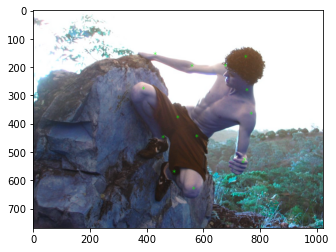

In [11]:
Visualize_LSP(LSP,'train',2)

In [35]:
def make_dataset_LSP(LSP,k):
    kp_data=LSP.get(k,'keypoints')
    keypoint_name=LSP.get(k,'keypoint_names')
    file_name=LSP.get(k,'image_filenames')
    
    ###### Keypoint_Num and Name ########
    kp_name=[]
    for u in tqdm(range(14)):
        time.sleep(0.0000001)
        na=''
        for k in keypoint_name[u]:
            if k!=0:
                na=na+chr(k)
        kp_name.append(na)
        
    ######### Keypoint ##########
    
    
    ######### Image ############
    
    img_data=[]
    for i in tqdm(file_name):
        time.sleep(0.0000000001)
        le=''
        for j in i:
            if j != 0:
                le=le+chr(j)
        img=cv2.imread(le)
        img_data.append(img)
    img_data=np.array(img_data)
    kp_data=np.array(kp_data)
    kp_name=np.array(kp_name)
    return img_data, kp_data, kp_name

In [41]:
img_data, kp_data, kp_name =make_dataset_LSP(LSP,'test')

100%|██████████| 1000/1000 [00:06<00:00, 147.85it/s]
/home/lab/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [42]:
img_data[0].shape

(702, 1024, 3)

In [43]:
kp_data.shape

(1000, 14, 3)

In [44]:
kp_name

array(['Right ankle', 'Right knee', 'Right hip', 'Left hip', 'Left knee',
       'Left ankle', 'Right wrist', 'Right elbow', 'Right shoulder',
       'Left shoulder', 'Left elbow', 'Left wrist', 'Neck', 'Head top'],
      dtype='<U14')

In [45]:
np.save('/home/lab/양창희/Pose Estimation/Dataset/LSP/Test/Test_img_data.npy',img_data)
np.save('/home/lab/양창희/Pose Estimation/Dataset/LSP/Test/Test_kp_data.npy',kp_data)
np.save('/home/lab/양창희/Pose Estimation/Dataset/LSP/Test/Test_kp_name.npy',kp_name)